<a href="https://colab.research.google.com/github/marianateixeiraa/Aulas_Python/blob/main/dir_exercise/Exerc%C3%ADcioAula10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1)Quantos intervalos (ou qual largura de intervalo) é preciso implementar para ter uma precisão de 1% no resultado numérico na integração de $f(x)$ de 0 a 10?
$\dfrac{R_{num}-R_{an}}{R_{an}} \leq 1\% $

In [3]:
import math
import numpy as np

x_i = 0
x_f = 10
n_steps = np.arange(10, 10000, 1)
an = math.exp(0)-math.exp(-10)

for i in n_steps:
    dx = (x_f - x_i)/i
    x = np.arange(x_i, x_f, dx)
    S1 = 0
    for xi in x:
        S1 = S1 + math.exp(-xi)*dx
    if (S1 - an)/an <= 0.01:
        print(f"Soma de {i} caixinhas =", S1)
        break

Soma de 502 caixinhas = 1.00994737378044


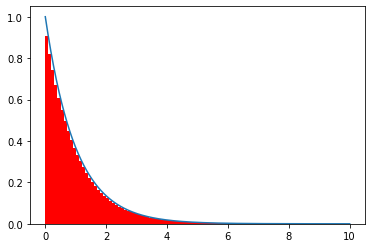

Soma de 100 caixinhas = 0.9507900267172598


In [6]:
import matplotlib.pyplot as plt

x_i = 0
x_f = 10
dx = 0.1
x = np.arange(x_i, x_f, dx)
S = 0
for xi in x:
    S = S + math.exp(-(xi+dx))*dx 

y = [math.exp(-xi-dx) for xi in x] 
plt.bar(x, y, color="red", align="edge", width=0.1)
x1 = np.linspace(0,10, 1000) # intervalo de 0 a 10, com 1000 divisões
y1 = [math.exp(-xi) for xi in x1]
plt.plot(x1, y1)
plt.show()
    
print("Soma de 100 caixinhas =", S)

In [7]:
x_i = 0
x_f = 10
dx = 0.01
x = np.arange(x_i, x_f, dx)
S = 0
for xi in x:
    S = S + ((math.exp(-(xi+dx)) + math.exp(-xi))/2)*dx 
    
print("Soma de 1000 caixinhas =", S)

Soma de 1000 caixinhas = 0.9999629330113492


In [8]:
import numpy as np
import math

xi = 0
xf = 2*math.pi
n_steps = 10000
dx = abs((xf - xi))/n_steps
x = np.arange(xi, xf, dx)
s1 = 0
s2 = 0
for i in x:
    s1 = s1 + math.sin(i)*dx
    s2 = s2 + math.cos(i)*dx

print("Integral do seno de 0 a 2pi, soma de 10000 caixinhas =", s1)
print("Integral do cosseno de 0 a 2pi, soma de 10000 caixinhas =", s2)

Integral do seno de 0 a 2pi, soma de 10000 caixinhas = -3.4143411059876175e-16
Integral do cosseno de 0 a 2pi, soma de 10000 caixinhas = -1.2912847874302358e-16


In [9]:
import numpy as np
import math

xi = 0
xf = 10
n_steps = 1000000
dx = abs((xf - xi))/n_steps
x = np.arange(xi, xf, dx)
s1 = 0
s2 = 0
for i in x:
    s1 = s1 + math.sinh(i)*dx
    s2 = s2 + math.cosh(i)*dx

print("Integral do seno hiperbólico de 0 a 2pi, soma de 1000000 caixinhas =", s1)
print("Integral do cosseno hiperbólico de 0 a 2pi, soma de 1000000 caixinhas =", s2)

Integral do seno hiperbólico de 0 a 2pi, soma de 1000000 caixinhas = 11012.177854030622
Integral do cosseno hiperbólico de 0 a 2pi, soma de 1000000 caixinhas = 11013.177813630555


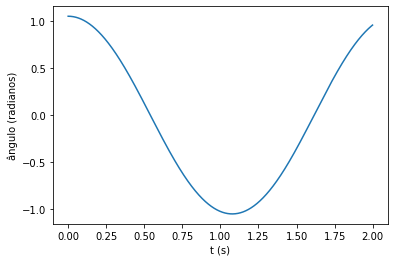

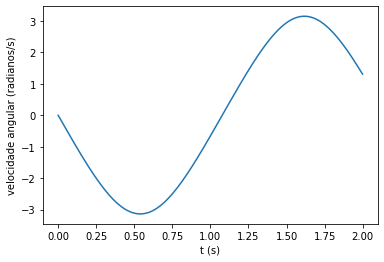

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt


def theta2_prime(t, theta1, g = 9.8, l = 1):
    return -(g/l)*math.sin(theta1)

def theta1_prime(t, theta2):
    return theta2

def euler_cromer_2order(theta1_prime, theta2_prime, t, theta1_0, theta2_0):
    theta1 = [theta1_0]   
    theta2 = [theta2_0]    
    dt = t[1] - t[0]
    for i in range(len(t)-1):
        theta1_iplus1 = theta1[i] + theta1_prime(t[i], theta2[i])*dt
        theta2_iplus1 = theta2[i] + theta2_prime(t[i], theta1[i])*dt
        theta1.append(theta1_iplus1)
        theta2.append(theta2_iplus1)
    return theta1, theta2

t = np.arange(0, 2, 0.001)
a = math.pi/3
theta1, theta2 = euler_cromer_2order(theta1_prime, theta2_prime, t, a, 0)


plt.plot(t, theta1)
plt.xlabel("t (s)")
plt.ylabel("ângulo (radianos)")
plt.show()
plt.plot(t, theta2)
plt.xlabel("t (s)")
plt.ylabel("velocidade angular (radianos/s)")
plt.show()

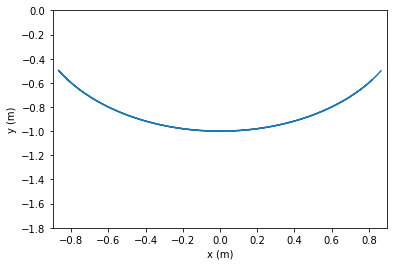

In [11]:
def pendulum_x(amplitude, length, theta, g):
    import math
    x = length*math.sin(theta)
    return x 

def pendulum_y(amplitude, length, theta, g):
    import math
    y = - length*math.cos(theta)
    return y 

x = []
y = []
for i in range(len(t)-1):
    x.append(pendulum_x(a, 1, theta1[i], 9.8))
    y.append(pendulum_y(a, 1, theta1[i], 9.8))

plt.plot(x, y)
plt.axis([-0.9, 0.9, -1.8, 0])
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.show() 

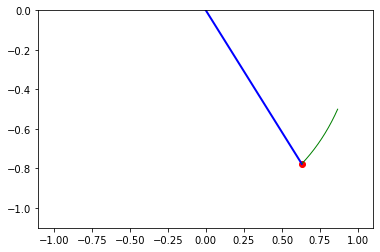

In [12]:
import matplotlib.animation as animation
from matplotlib import rc
rc('animation', html='jshtml')
from IPython.display import HTML, Image, display # For GIF

fig, ax = plt.subplots()
xdata, ydata = x, y
ln, = plt.plot([], [], 'ro', animated = True)    ### A massa 
spring, = plt.plot([], [], 'b-', linewidth = 2)  ### A linha do pendulo
traj, = plt.plot([], [],'g-', linewidth=1)         ### A trajetoria


def init():
   L = 1
   ax.set_xlim(-1.1*L, 1.1*L)      ### O “quadro” e eixos, 
   ax.set_ylim(-1.1*L,0)           ### no caso do pendulo simples L delimita o tamanho
   return ln,

def draw(n):
   spring.set_data([0.0, xdata[n]], [0.0,  ydata[n]])
   ln.set_data(xdata[n], ydata[n])
   traj.set_data(xdata[:n],ydata[:n])
   return spring, ln, traj

ani = animation.FuncAnimation(fig, draw, 301, interval= 1,  init_func=init, blit=True)
# Save as GIF
ani.save('anima_pendulo_simples.gif', writer='pillow', fps=60)